# Examples of estimation in Markov's chains
## Hidden Markov Model, HMM

### Woman, her activity and weather

In this [problem]('https://en.wikipedia.org/wiki/Hidden_Markov_model') we know only the result of woman's activity and have to estimate weather

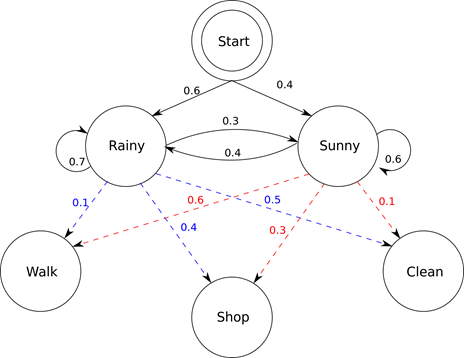

Optimal $\hat X (t) = E[X(t) | Y_t]$ (not linear) estimation for probability of Rainy/Sunny days can be computed by next formula

Start:

$\hat X (0) = norm(diag(Q(0) Y(0)) \pi(0))$

Step:

$ \tilde X (t) = P^{T} (t) \hat X (t-1)$

Correction:

$\hat X (t) = norm(diag(Q(t) Y(t)) \tilde X (t))$

Where:

$diag$ - function which make from vector square matrix with vector's elements on diagonal

$norm$ - function which make normalization of len of vector

$P(t)$ - probability transition matrix for weather

$Q(t)$ - probabily transition matrix for action by weather


Also, we will compare this results with optimal linear estimation (Kalman filter)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from tqdm.notebook import tqdm
import seaborn as sns
from numba import njit, prange

%load_ext autoreload
%autoreload 1
%aimport classes.MarkovChains

In [7]:
days = 365
P = np.array([[0.7, 0.3],[0.4, 0.6]])
p0 = np.array([0.6, 0.4])
Q = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])

Dasha_U = classes.MarkovChains.Woman(days=days, P=P, p0=p0, p_action=Q)
true_weather = Dasha_U.simulate_weather()
Dasha_U.simulate_action()
est_weather = Dasha_U.optimal_estimation()
est_linear = Dasha_U.linear_estimation() # Kalman filter

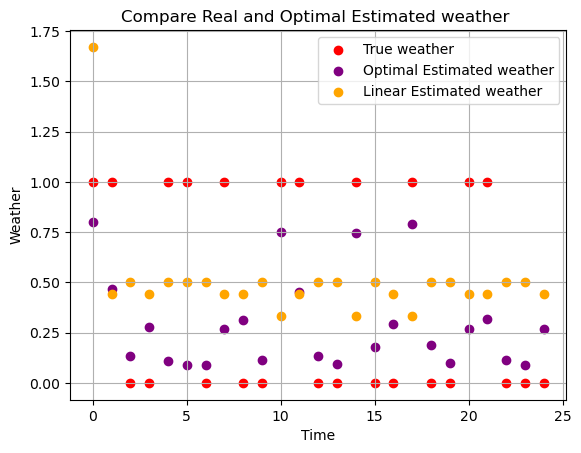

<Figure size 1200x600 with 0 Axes>

In [10]:
year = np.arange(days)
N = 25
plt.scatter(year[:N], true_weather[:N], linestyle='-', c='red', label='True weather')
plt.scatter(year[:N], np.array(est_weather)[:,1][:N], linestyle='-', c='purple', label='Optimal Estimated weather')
plt.scatter(year[:N], np.array(est_linear)[:,1][:N], linestyle='-', c='orange', label='Linear Estimated weather')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Weather')
plt.title("Compare Real and Optimal Estimated weather ")
plt.legend()
plt.figure(figsize=(12, 6))
plt.show()

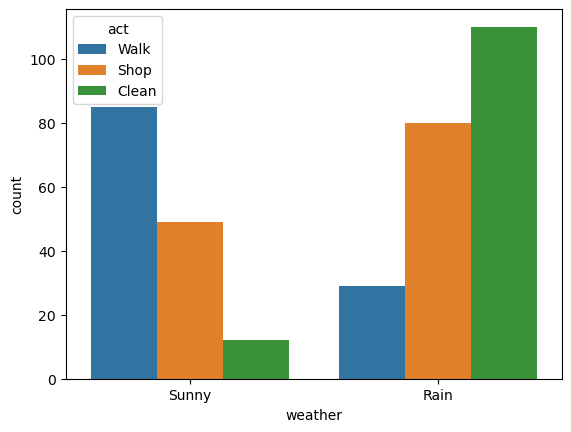

In [12]:
Dasha_U.plot_statistic()

In [13]:
N = 1000
girl = classes.MarkovChains.Woman(days=days)
df = pd.DataFrame(np.zeros((days, 2)),columns = ['sqerr_optimal', 'sqerr_linear'], index=np.arange(days))
for _ in tqdm(range(N)):
    true_weather = girl.simulate_weather()
    girl.simulate_action()
    est_weather = girl.optimal_estimation()
    est_linear = girl.linear_estimation() # Kalman filter
    df['sqerr_optimal'] += (np.array(est_weather)[:,1] - true_weather)**2
    df['sqerr_linear'] += (np.array([max(min(i,1), 0) for i in np.array(est_linear)[:,1]]) - true_weather)**2
df['sqerr_linear'] /= N
df['sqerr_optimal'] /= N


  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0, 0.5, 'Error')

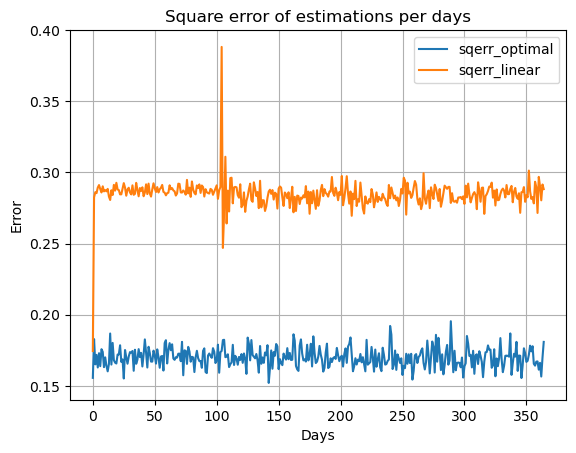

In [14]:
df.plot()
plt.legend()
plt.title("Square error of estimations per days")
plt.grid()
plt.xlabel('Days')
plt.ylabel('Error')

## Results

Optimal estimation give better and more stable results then usual Kalman filter in this problem